In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [98]:
# This function wi
def get_directory_info(directory):
    sizes = list()
    widths = []
    heights = []
    
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            if(f.endswith(".jpg")):
               size = round(os.path.getsize(f)/1023) #This will convert the size to kilobytes
               sizes.append(size)
                
               img_path = os.path.join(f) # Making image file path
               im = Image.open(img_path)
               widths.append(im.size[0])
               heights.append(im.size[1])

            
    AVG_HEIGHT = round(sum(heights)/len(heights))
    AVG_WIDTH = round(sum(widths)/len(widths))
    
    return (np.mean(sizes), np.max(sizes), np.min(sizes), np.std(sizes), AVG_HEIGHT, AVG_WIDTH) # will return the basic stats for the directory

In [99]:
m1, m2, m3, s, w, h = get_directory_info(directory)

In [100]:
print(m1, m2, m3, s, w, h)

61.77777777777778 138 29 37.846995412164425 574 589


In [25]:
directory = 'artist'

In [26]:
def get_raw_data(directory,category):
    local_data = list()
     
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            if(f.endswith(".jpg")):
               size = round(os.path.getsize(f)/1023) #This will convert the size to kilobytes
                              
               img_path = os.path.join(f) # Making image file path
               im = Image.open(img_path)
               
               local_data.append([category, f, size, im.size[0], im.size[1]])
       
    return (local_data) # will return the 

In [27]:
ld = get_raw_data(directory, 'ARTIST.cups')

In [28]:
ld

[['ARTIST.cups', 'artist\\14ceb76f3d33990052227fda8cc537dd.jpg', 48, 563, 593],
 ['ARTIST.cups', 'artist\\26cc3e62ec66c44da882a6ca43fd0a0b.jpg', 29, 442, 324],
 ['ARTIST.cups', 'artist\\2c0aa1f0dfe1f62d5bb6e0dcd0de08cb.jpg', 31, 474, 474],
 ['ARTIST.cups', 'artist\\51g0MX+SR5L._SY780_.jpg', 50, 500, 496]]

In [29]:
artist_cups = pd.DataFrame(ld)

In [30]:
for x in ld:
    print(x)

['ARTIST.cups', 'artist\\14ceb76f3d33990052227fda8cc537dd.jpg', 48, 563, 593]
['ARTIST.cups', 'artist\\26cc3e62ec66c44da882a6ca43fd0a0b.jpg', 29, 442, 324]
['ARTIST.cups', 'artist\\2c0aa1f0dfe1f62d5bb6e0dcd0de08cb.jpg', 31, 474, 474]
['ARTIST.cups', 'artist\\51g0MX+SR5L._SY780_.jpg', 50, 500, 496]


In [24]:
dalle_cups.head()

,0,1,2,3,4
0,DALLE.cups,generated\51x0zsxJsvL._SY780_.jpg,52,499,500
1,DALLE.cups,generated\7da86c9d687cbe4cbfc15baa23c76ad2.jpg,123,564,844
2,DALLE.cups,generated\9aa7b0b97ebad9254aeabbfbeff81155.jpg,34,499,499
3,DALLE.cups,generated\9f045afcbaa1cc7836baa3bca3c1801e.jpg,138,1024,768
4,DALLE.cups,generated\9f1e957c5d64945391f6e8a8e6903e01.jpg,51,736,667


In [31]:
artist_cups

,0,1,2,3,4
0,ARTIST.cups,artist\14ceb76f3d33990052227fda8cc537dd.jpg,48,563,593
1,ARTIST.cups,artist\26cc3e62ec66c44da882a6ca43fd0a0b.jpg,29,442,324
2,ARTIST.cups,artist\2c0aa1f0dfe1f62d5bb6e0dcd0de08cb.jpg,31,474,474
3,ARTIST.cups,artist\51g0MX+SR5L._SY780_.jpg,50,500,496


In [34]:
df = pd.concat([dalle_cups, artist_cups])

In [42]:
df.columns = ['category', 'filename','size','height','width']

<AxesSubplot:xlabel='category'>

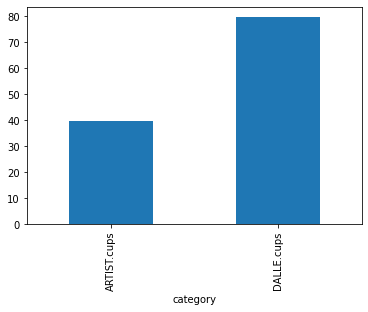

In [44]:
df['size'].groupby(df['category']).mean().plot(kind='bar')

In [45]:
np.mean(df['size'])

61.77777777777778